In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
sns.set(color_codes=True)

In [37]:
df = pd.read_csv('heart_disease (1).csv')

In [38]:
before_rows = df.shape[0]
df = df.dropna()
after_rows = df.shape[0]

print("Total rows:", after_rows)
print(df['Heart Disease Status'].value_counts())
print(f"Removed {before_rows - after_rows} rows containing null values.")

Total rows: 7067
Heart Disease Status
No     5632
Yes    1435
Name: count, dtype: int64
Removed 2933 rows containing null values.


In [39]:
# 1.2 Balance Dataset
df_yes = df[df['Heart Disease Status'] == "Yes"]
df_no = df[df['Heart Disease Status'] == "No"]

# Match 'No' count to 'Yes' count
df_no_sampled = df_no.sample(n=len(df_yes), random_state=42)

# Combine both classes
df_balanced = pd.concat([df_yes, df_no_sampled])

# Shuffle dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Final balance check
print("\n=== After balancing ===")
print(df_balanced['Heart Disease Status'].value_counts())



=== After balancing ===
Heart Disease Status
Yes    1435
No     1435
Name: count, dtype: int64


In [40]:
df_balanced.shape

(2870, 21)

In [41]:
# Define numerical features for Z-score calculation
from scipy.stats import zscore
features = ['Age', 'Blood Pressure', 'Cholesterol Level']
df_zscore = df_balanced.copy()
for col in features:
    df_zscore[f'{col}_zscore'] = zscore(df_zscore[col])

# Threshold for Z-score
z_thresh = 3
df_zscore_filtered = df_zscore[
    (df_zscore['Age_zscore'].abs() < z_thresh) &
    (df_zscore['Blood Pressure_zscore'].abs() < z_thresh) &
    (df_zscore['Cholesterol Level_zscore'].abs() < z_thresh)
]
print(f"Original dataset shape: {df_balanced.shape}")
print(f"Filtered dataset shape (after removing outliers): {df_zscore_filtered.shape}")
print(f"Number of rows removed: {df_balanced.shape[0] - df_zscore_filtered.shape[0]}")

Original dataset shape: (2870, 21)
Filtered dataset shape (after removing outliers): (2870, 24)
Number of rows removed: 0


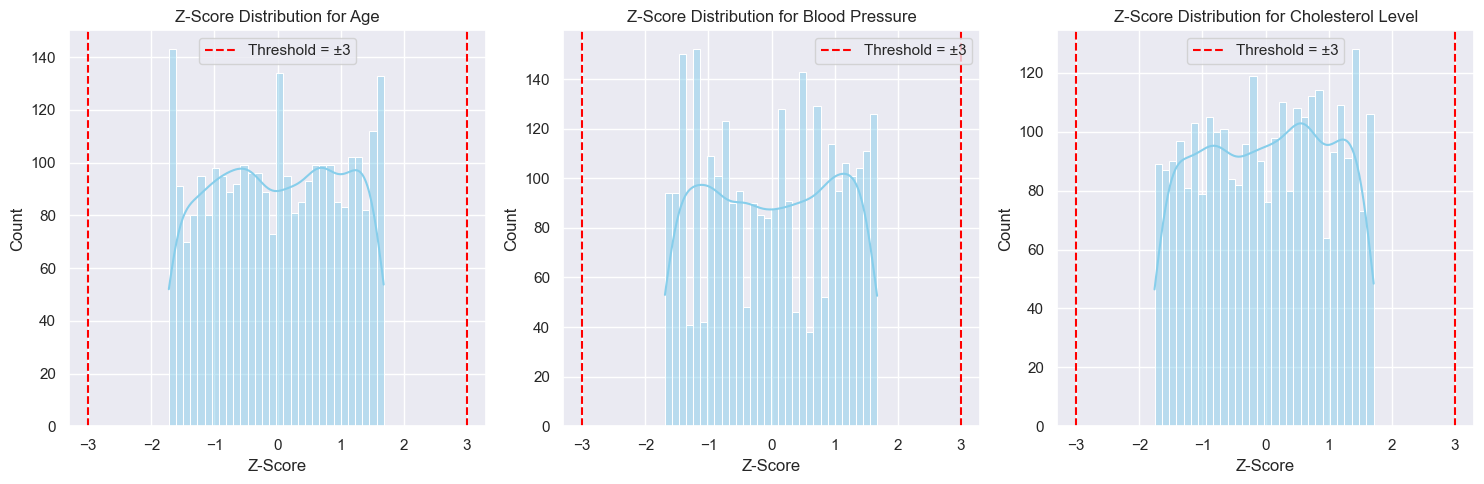

In [42]:
# Visualize Z-score distributions with histograms
plt.figure(figsize=(15, 5))

for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=df_zscore, x=f'{col}_zscore', bins=30, kde=True, color='skyblue')
    plt.axvline(x=z_thresh, color='red', linestyle='--', label=f'Threshold = ±{z_thresh}')
    plt.axvline(x=-z_thresh, color='red', linestyle='--')
    plt.title(f'Z-Score Distribution for {col}')
    plt.xlabel('Z-Score')
    plt.ylabel('Count')
    plt.legend()

plt.tight_layout()
plt.show()

In [43]:
df_iqr = df_balanced.copy()
for col in features:
    Q1 = df_iqr[col].quantile(0.25)
    Q3 = df_iqr[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_iqr = df_iqr[(df_iqr[col] >= lower_bound) & (df_iqr[col] <= upper_bound)]

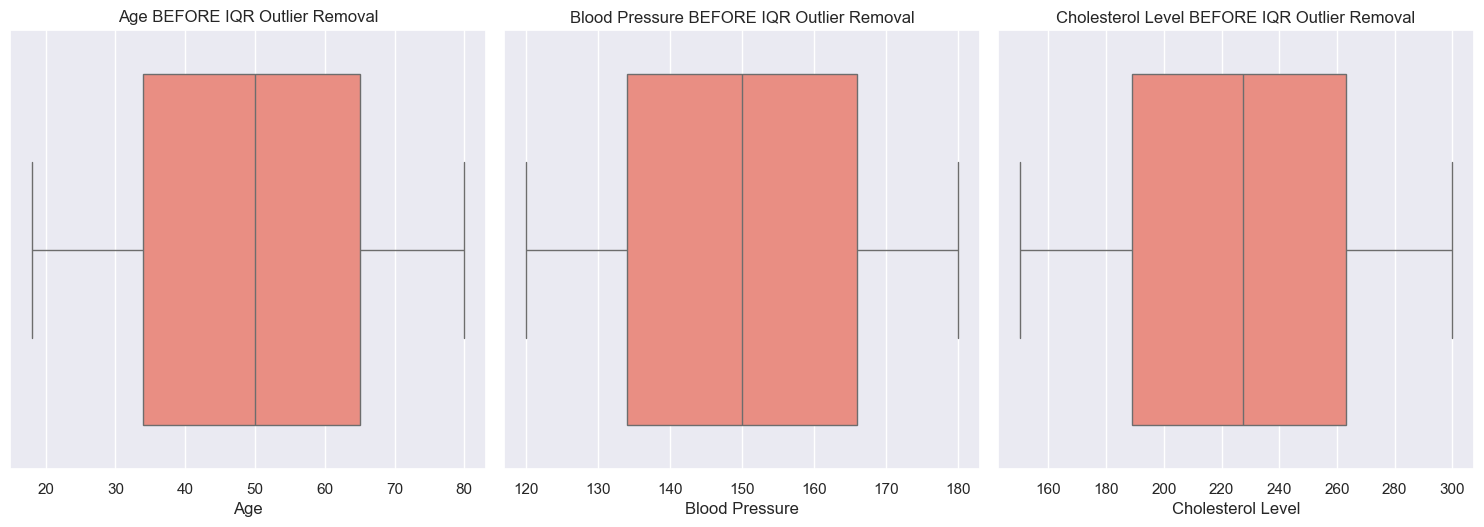

In [49]:
plt.figure(figsize=(15, 10))

# Boxplots BEFORE Outlier Removal
plt.subplot(2, 3, 1)
sns.boxplot(x=df_balanced['Age'], color='salmon')
plt.title('Age BEFORE IQR Outlier Removal')

plt.subplot(2, 3, 2)
sns.boxplot(x=df_balanced['Blood Pressure'], color='salmon')
plt.title('Blood Pressure BEFORE IQR Outlier Removal')

plt.subplot(2, 3, 3)
sns.boxplot(x=df_balanced['Cholesterol Level'], color='salmon')
plt.title('Cholesterol Level BEFORE IQR Outlier Removal')

plt.tight_layout()
plt.show()

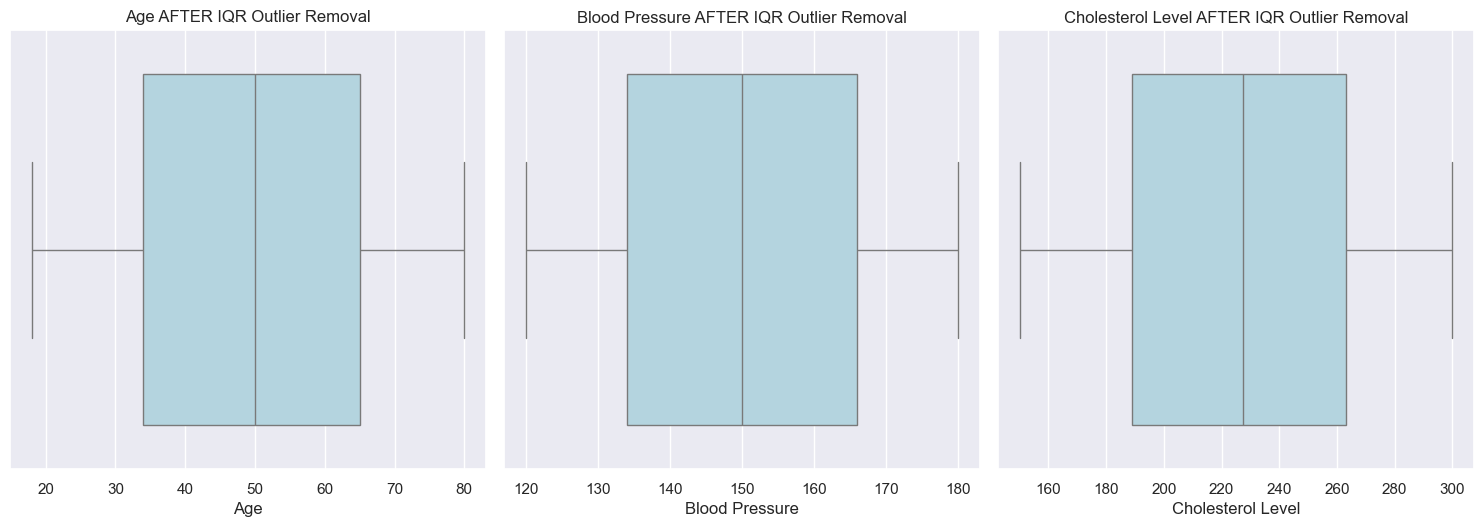

In [48]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 4)
sns.boxplot(x=df_iqr['Age'], color='lightblue')
plt.title('Age AFTER IQR Outlier Removal')

plt.subplot(2, 3, 5)
sns.boxplot(x=df_iqr['Blood Pressure'], color='lightblue')
plt.title('Blood Pressure AFTER IQR Outlier Removal')

plt.subplot(2, 3, 6)
sns.boxplot(x=df_iqr['Cholesterol Level'], color='lightblue')
plt.title('Cholesterol Level AFTER IQR Outlier Removal')

plt.tight_layout()
plt.show()